<a href="https://colab.research.google.com/github/tada20001/NLP_2023/blob/main/CH9_05_%EA%B8%80%EB%A1%9C%EB%B8%8C(GloVe).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

글로브(Global Vectors for Word Representation, GloVe)는 카운트와 예측 모두를 기반으로 하는 방법론으로 2014년 스탠포드 대학에서 개발한 단어 임베딩 방법론임

기존의 카운트 기반의 LSA(Latent Semantic Analysis)와 예측기반의 Word2Vec의 단점을 보완하는 목적으로 개발되었으며, 실제로 Word2Vec만큼의 성능을 보임

### 1. 기존 방법론에 대한 비판
------------------------------
LSA는 DTM이나 TF-IDF 행렬과 같이 각 문서에서의 각 단어의 빈도수를 카운트한 행렬이라는 전체적인 통계정보를 입력으로 받아 차원을 축소(Truncated SVD)하여 잠재된 의미를 끌어내는 방법론임

반면, Word2Vec은 실제값과 예측값에 대한 오차를 손실함수를 통해 줄여나가며 학습하는 예측 기반의 방법론임

LSA는 카운트 기반으로 코퍼스의 전체적인 통계정보를 고려하기는 하지만 단어의미의 유추작업에서는 성능이 떨어짐. Word2Vec은 예측기반으로 단어간 유추 작업에는 LSA보다 뛰어나지만, 임베딩 벡터가 윈도우 크기내에서만 주변단어를 고려하기 때문에 코퍼스의 전체적인 통계정보를 반영하지 못함

GloVe는 이러한 기존 방법론의 각각의 한계를 지적하며, LSA의 메커니즘이었던 카운트 기반의 방법과 Word2Vec의 메커니즘이었던 예측 기반의 방법론 모두 사용함


### 2. 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)
-----------------------
단어의 동시 등장행렬은 행과 열을 전체 단어집합의 단어들로 구성하고, i 단어의 윈도우 크기(window size)내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬을 말함



### 3. 동시등장확률(Co-occurrence Probability)
------------------------
동시등장확률$P(k\ |\ i)$은 동시등장행렬로부터 특정 단어 i의 전체 등장횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률임

$P(k\ |\ i)$에서 i를 중심단어(center word), k를 주변단어(context word)라고 할 때, 동시등장행렬에서 중심단어 i 행의 모든 값을 더한 값을 분포로 하고, i행 k열의 값을 분자로 한 값이라고 불 수 있음


동시 등장행렬과 동시등장확률의 이해를 바탕으로 손실함수 설계

### 4. 손실함수(Loss Function)
-------------------
* $X$ : 동시 등장 행렬(Co-occurrence Matrix)
* $X_{ij}$ : 중심단어 i가 등장했을때 윈도우 내 주변단어 j가 등장하는 횟수
* $X_{i} : \sum_j X_{ij}$ : 동시등장행렬에서 i행의 값을 모두 더한 값
* $P_{ik} : P(k\ |\ i) = \frac{X_{ik}}{X_{i}}$ : 중심단어 i가 등장할 때 윈도우 내 주변단어 k가 등장할 확률
  * Ex) P(solid l ice) = 단어 ice가 등장했을 때 단어 solid가 등장할 확률

* $\frac{P_{ik}}{P_{jk}}$ : ${P_{ik}}$를 ${P_{jk}}$로 나눈 값
  * Ex) P(solid l ice) / P(solid l steam) = 8.9
* $w_{i}$ : 중심단어의 임베딩 벡터
* $\tilde{w_{k}}$ : 주변단어 k의 임베딩 벡터

GloVe의 개념은 즉, **임베딩된 중심단어와 주변단어 벡터의 내적이 전체 코퍼스의 동시등장확률이 되도록 만드는 것**임

$$dot\ product(w_{i}\ \tilde{w_{k}}) \approx\ P(k\ |\ i) = P_{ik}$$


더 정확히는 GloVe는 아래와 같은 관계를 가지도록 임베딩 벡터를 설계함

$$dot\ product(w_{i}\ \tilde{w_{k}}) \approx\ log\ P(k\ |\ i) = log\ P_{ik}$$

임베딩 벡터를 만들기 위해 손실함수는 첫째, 단어간의 관계를 잘 표현하는 함수여야 함. 이를 위해 $P_{ik} / P_{jk}$를 식에 사용함

벡터 $w_{i}, w_{j}, \tilde{w_{k}}$를 가지고 어떤 함수 F를 수행하면, $P_{ik} / P_{jk}$가 나온다는 초기 식에서 전개됨

$$F(w_{i},\ w_{j},\ \tilde{w_{k}}) = \frac{P_{ik}}{P_{jk}}$$

아직 이 함수 $F$가 어떤 식을 가지고 있는지 정해진게 없음

함수 $F$는 두 단어 사이의 동시등장확률의 크기 관계비(ratio) 정보를 벡터 공간에 인코딩하는 것이 목적임

이를 위해 GloVe 연구팀은 $w_i$와 $w_j$라는 두 벡터의 차이를 함수 $F$의 입력으로 사용하는 것을 제안함

$$F(w_{i} -\ w_{j},\ \tilde{w_{k}}) = \frac{P_{ik}}{P_{jk}}$$

그런데 우변은 스칼라값이고 좌변은 벡터값임. 이를 맞추기 위해 함수 F의 두 입력에 내적을 수행함
$$F((w_{i} -\ w_{j})^{T} \tilde{w_{k}}) = \frac{P_{ik}}{P_{jk}}$$

정리하면, 선형공간(Linear space)에서 단어의 의미 관계를 표현하기 위해 뺄셈과 내적을 택함

여기서 함수 $F$가 만족해야 하는 필수조건으로, 중심단어 $w$와 주변단어 $\tilde{w}$라는 선택기준은 실제로는 무작위 선택이므로 이 둘의 관계는 자유롭게 치환될 수 있어야 함. 이것이 성립되기 위해서는 함수 $F$가 실수의 덧셈과 양수의 곱셈에 대해 준동형(Homomorphism)을 만족하도록 함

즉, $a$와 $b$에 대해 함수 $F$가 $F(a + b)$가 $F(a)F(b)$와 같도록 만족시켜야 함

식으로 나타내면 아래와 같음
$$F(a+b) = F(a)F(b),\ \forall a,\ b\in \mathbb{R}$$

이 준동형식을 현재 전개하던 GloVe 식에 적용할 수 있도록 조금씩 바꿔볼 것임. 전개하던 GloVe 식에 따르면, 함수 $F$는 결과값으로 스칼라 값 $\frac{P_{ik}}{P_{jk}}$이 나와야 함

준동형식에서 $a$와 $b$가 각각 벡터값이라면 함수 $F$의 결과값으로는 스칼라 값이 나올 수 없지만, $a$와 $b$가 각각 사실 두 벡터의 내적값이라고 하면 결과값으로 스칼라 값이 나올 수 있음

그러므로 위의 준동형식을 아래와 같이 바꿀 수 있음. 여기서 $v_{1},\ v_{2},\ v_{3},\ v_{4}$는 벡터값으로 아래의 $V$는 벡터를 의미함

$$F(v_{1}^{T}v_{2} + v_{3}^{T}v_{4}) = F(v_{1}^{T}v_{2})F(v_{3}^{T}v_{4}),\ \forall v_{1},\ v_{2},\ v_{3},\ v_{4}\in V$$

그런데 앞서 작성한 GloVe 식에서는 $w_{i}$와 $w_{j}$라는 두 벡터의 차이를 함수 $F$의 입력으로 받음. GloVe 식에 바로 적용하기 위해 준동형 식을 뺄셈의 준동형식으로 변경함. 그렇게 되면 곱셈도 나눗셈으로 바뀜

$$F(v_{1}^{T}v_{2} - v_{3}^{T}v_{4}) = \frac{F(v_{1}^{T}v_{2})}{F(v_{3}^{T}v_{4})},\ \forall v_{1},\ v_{2},\ v_{3},\ v_{4}\in V$$


이 준동형 식을 GloVe 식에 적용해 보면, 우선 함수 $F$의 우변은 다음과 같이 바뀌어야 함

$$F((w_{i} -\ w_{j})^{T} \tilde{w_{k}}) = \frac{F(w_{i}^{T}\tilde{w_{k}})}{F(w_{j}^{T}\tilde{w_{k}})}$$

그런데 이전의 식에 따르면 우변은 본래 $\frac{P_{ik}}{P_{jk}}$였으므로, 결과적으로 다음과 같음

$$\frac{P_{ik}}{P_{jk}} = \frac{F(w_{i}^{T}\tilde{w_{k}})}{F(w_{j}^{T}\tilde{w_{k}})}$$

$$F(w_{i}^{T}\tilde{w_{k}}) = P_{ik} = \frac{X_{ik}}{X_{i}}$$

좌변을 풀어쓰면 다음과 같음
$$F(w_{i}^{T}\tilde{w_{k}}\ -\ w_{j}^{T}\tilde{w_{k}}) = \frac{F(w_{i}^{T}\tilde{w_{k}})}{F(w_{j}^{T}\tilde{w_{k}})}$$

이는 뺄셈에 대한 준동형식의 형태와 정확히 일치함. 이를 만족하는 함수 $F$를 찾아야 할 때임. 그리고 이를 정확하게 만족시키는 함수가 있는데 이것이 지수함수임. $F$를 지수함수 $exp$라고 함

$$exp(w_{i}^{T}\tilde{w_{k}}\ -\ w_{j}^{T}\tilde{w_{k}}) = \frac{exp(w_{i}^{T}\tilde{w_{k}})}{exp(w_{j}^{T}\tilde{w_{k}})}$$

$$exp(w_{i}^{T}\tilde{w_{k}}) = P_{ik} = \frac{X_{ik}}{X_{i}}$$

위의 두번째 식으로부터 다음과 같은 식을 얻을 수 있음

$$w_{i}^{T}\tilde{w_{k}} = log\ P_{ik} = log\ (\frac{X_{ik}}{X_{i}}) = log\ X_{ik} - log\ X_{i}$$


그런데 여기서 상기해야할 것은 앞서 언급했듯이, 사실 
$w_{i}$와 $\tilde{w_{k}}$는 두 값의 위치를 서로 바꾸어도 식이 성립해야 함. $X_{ik}$의 정의를 생각해보면 
와도 같음. 

그런데 이게 성립되려면 위의 식에서 $log\ X_{i}$
항이 걸림돌임임. 이 부분만 없다면 이를 성립시킬 수 있음. 그래서 GloVe 연구팀은 이 $log\ X_{i}$항을 
$w_{i}$에 대한 편향 $b_{i}$라는 상수항으로 대체하기로 함. 같은 이유로 $\tilde{w_{k}}$에 대한 편향 $\tilde{b_{k}}$를 추가함.

$$w_{i}^{T}\tilde{w_{k}} + b_{i} + \tilde{b_{k}} = log\ X_{ik}$$


이 식이 손실함수의 핵심이 되는 식임. 우변의 값과의 차이를 최소화하는 방향으로 좌변의 4개의 항은 학습을 통해 값이 바뀌는 변수들이 됨. 즉, 손실함수는 다음과 같이 일반화할 수 있음

$$Loss\ function = \sum_{m, n=1}^{V}\ (w_{m}^{T}\tilde{w_{n}} + b_{m} + \tilde{b_{n}} - logX_{mn})^{2}$$

여기서 $V$는 단어집합의 크기를 의미하나, 아직 최적의 손실함수를 만들려면, $log\ X_{ik}$에서 $X_{ik}$ 값이 0이 되어야 함. 대안 중 하나는 $log\ X_{ik}$ 항을 $log\ (1 + X_{ik})$로 변경하는 것임

또한, 동시등장행렬 $X$는 마치 DTM처럼 희소행렬일 가능성이 크기 때문에, GloVe 연구팀은 동시등장행렬에서 동시등장빈도의 값 $X_{ik}$이 굉징히 낮은 경우에는 정보에 거의 도움이 되지 않는다고 판단함. 

따라서, 이에 대한 가중치를 고려한 방법으로 $X_{ik}$의 값에 영향을 받는 가중치함수 $f(X_{ik})$를 손실함수에 도입하는 것임

GloVe에 도입되는 $f(X_{ik})$의 그래프는 다음과 같이 됨



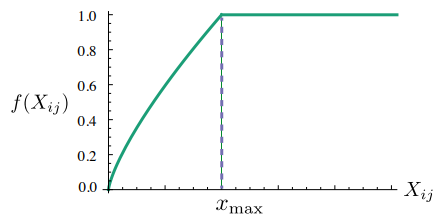

$X_{ik}$의 값이 작으면 상대적으로 함수의 값은 작도록 하고, 값이 크면 함수의 값은 상대적으로 크도록 함. 그러나 지나치게 높으면 가중치를 주지 않아 함수의 최대값이 정해져 있음(최대값 = 1)


예를 들어 'It is'와 같은 불용어의 동시 등장 빈도수가 높다고 해서 지나친 가중을 받아서는 안 됨. 이 함수의 값을 손실 함수에 곱해주면 가중치의 역할을 할 수 있음.

이 함수 $f(x)$의 식은 다음과 같이 정의됨


$$f(x) = min(1,\ (x/x_{max})^{3/4})$$

최종적으로 일반화된 손실함수는 다음과 같음

$$Loss\ function = \sum_{m, n=1}^{V}\ f(X_{mn})(w_{m}^{T}\tilde{w_{n}} + b_{m} + \tilde{b_{n}} - logX_{mn})^{2}$$


### 5. GloVe 훈련시키기
-----------------

In [1]:
!pip install glove==1.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for glove: filename=glove-1.0.0-py3-none-any.whl size=4040 sha256=36df18100dc738ea70e1987d171307ef999513147d70ae6464f82d4aecc8e944
  Stored in directory: /root/.cache/pip/wheels/e3/e3/a9/727b9142b682a1ec7fac4870841e08656de714b160082e99e9
Successfully built glove


#### 1) 데이터 로드 및 전처리

In [2]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f16736fd6a0>)

In [5]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

In [6]:
# content 데이터만 가져옴
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# (Audio), (Laughter) 등 제거
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해 NLTK를 이용하여 문장 토큰화 수행
sent_text = sent_tokenize(content_text)
sent_text[0]

"Here are two reasons companies fail: they only do more of the same, or they only do what's new."

In [7]:
sent_text[1]

'To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation.'

In [8]:
# 각 문장에 대해 구두점을 제거하고 대문자를 소문자로 변환
normalized_text = []
for string in sent_text:
  tokens = re.sub(r'[^a-z0-0]', ' ', string.lower())
  normalized_text.append(tokens)

In [9]:
# 각 문장에 대해 NLTK를 이용하여 단어 토큰화 수행
result = [word_tokenize(sentence) for sentence in normalized_text]
result[0]

['here',
 'are',
 'two',
 'reasons',
 'companies',
 'fail',
 'they',
 'only',
 'do',
 'more',
 'of',
 'the',
 'same',
 'or',
 'they',
 'only',
 'do',
 'what',
 's',
 'new']

In [10]:
len(result)

273380

#### 2) GloVe 훈련시키기

In [30]:
!python -m pip install glove-python-binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement glove-python-binary (from versions: none)
ERROR: No matching distribution found for glove-python-binary


In [24]:
glove_corpus = glove.Glove.

AttributeError: ignored